## Titanic Disaster

###  1. Problem definition
        Use machine learning/data science tools to create a model that predicts which passengers have survived the Titanic shipwreck. We're going to use classification model, because we have two target posibilities Survival (1) and not (0).
###  2. Data
        We got train and test data. Into train data we're going to make validation data set(0.2) to check our target values before we compare our prediction with test data. [datasource](https://www.kaggle.com/competitions/titanic/data)
###  3. Evaluation
   Kaggle score is the percentage of passengers you correctly predict. This is known as **accuracy**.
   survival	Survival	0 = No, 1 = Yes - target
   We're going to submit csv file with exactly 418 entries plus a header row. 
   The file should have exactly 2 columns:
       PassengerId (sorted in any order)
       Survived (contains your binary predictions: 1 for survived, 0 for deceased)
### 4. Features
   **pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
   **Age**	Age in years	
   **sibsp**	# of siblings / spouses aboard the Titanic	
   **parch**	# of parents / children aboard the Titanic	
   **ticket**	Ticket number	
   **fare**	Passenger fare	
   **cabin**	Cabin number	
   **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton 
   
   **sex**	Sex	(male/female)
    
   #### Explanation of features:
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    
    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.
### 5. Modeling
    We're going to use classification model. We are going to submit targets of the one with the greatest accuracy.
### 6. Experimenting
    Trying different models and manually tuning parameters.

# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [4]:
data_csv = pd.read_csv("train.csv")

In [5]:
data_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_csv.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA (Exploratory data analysis)

In [9]:
data_csv.shape

(891, 12)

In [10]:
data_csv['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
data_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data_csv.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data_csv.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
data_csv['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
data_csv['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
data_csv.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

* We are able to see a significant negative correlation between 'Survived' and 'Pclass'(less 'Age').
* And unespected a positive correlation between 'Survived' and 'Fare' (we are going to check 'Fare' values).
    
    additional explanation: A fare is the fee paid by a passenger for use of a public transport system.

In [24]:
max(data_csv['Fare']), min(data_csv['Fare']), data_csv['Fare'].mean()

(512.3292, 0.0, 32.2042079685746)

In [29]:
survived_max_fare = data_csv[data_csv['Fare']==max(data_csv['Fare'])]

In [30]:
survived_max_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


* People with max 'Fare' values survived. It's enough for additional checking (perheps it is concidence)

In [32]:
min(data_csv.Age), max(data_csv.Age), data_csv['Age'].mean()

(0.42, 80.0, 29.69911764705882)

### Check correlation between 'Sex' and Survived' 

In [33]:
pd.crosstab(data_csv['Sex'], data_csv['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


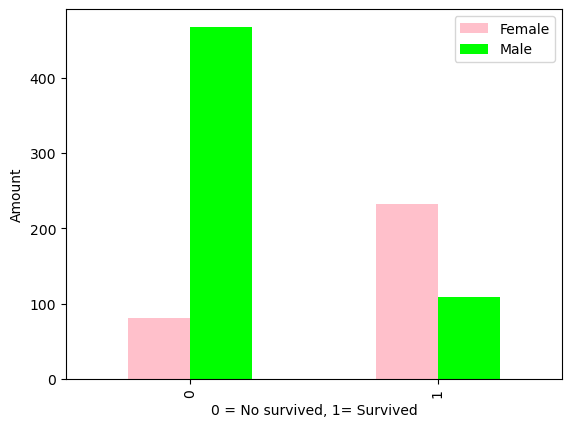

In [34]:
pd.crosstab(data_csv['Survived'], data_csv['Sex']).plot(kind="bar", color=["pink", "lime"])
plt.xlabel("0 = No survived, 1= Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

* More men were on the Titanic.
* More women have survived than not.
* More men haven't survived.
* We can assume correlation between 'Survived' and 'Sex' (maybe causality too)
* Because it's something we expected that women used lifeboats firstly.

### Check correlation between 'Pclass' and 'Survived'

In [35]:
pd.crosstab(data_csv['Pclass'], data_csv['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


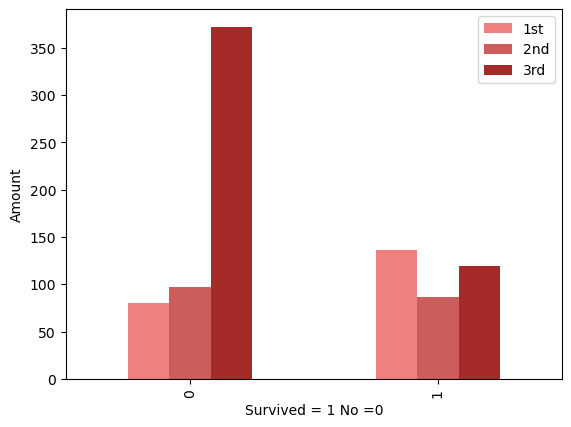

In [36]:
pd.crosstab(data_csv['Survived'], data_csv['Pclass']).plot(kind='bar', color=['lightcoral', 'indianred', 'brown']);
plt.ylabel("Amount")
plt.xlabel("Survived = 1 No =0")
plt.legend(["1st","2nd","3rd"]);

* The most of people was in 3rd class (lower socio-economic status) and the most of them weren't survived.
* People in 1st class had the best probability to survive.

### Check correlation between 'Fare' and 'Survived'

In [49]:
len(data_csv)

891

In [62]:
data_csv['Sex'][160]

'male'

In [63]:
for i in range(len(data_csv)):
    if data_csv['Fare'][i]>=250:
        data_csv['Fare_type'][i]= 'luxory fare'
    elif data_csv['Fare'][i]<250 and data_csv['Fare'][i]>=100:
        data_csv['Fare_type'][i] = 'expensive fare'
    elif data_csv['Fare'][i]<100 and data_csv['Fare'][i]>=50:
        data_csv['Fare_type'][i] = 'cheap fare'
    elif data_csv['Fare'][i]<50:
        data_csv['Fare_type'][i] = 'very cheap fare'

C:\Users\USER\AppData\Local\Temp\ipykernel_96888\1481584755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv['Fare_type'][i] = 'very cheap fare'
C:\Users\USER\AppData\Local\Temp\ipykernel_96888\1481584755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv['Fare_type'][i] = 'cheap fare'
C:\Users\USER\AppData\Local\Temp\ipykernel_96888\1481584755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv['Fare_typ

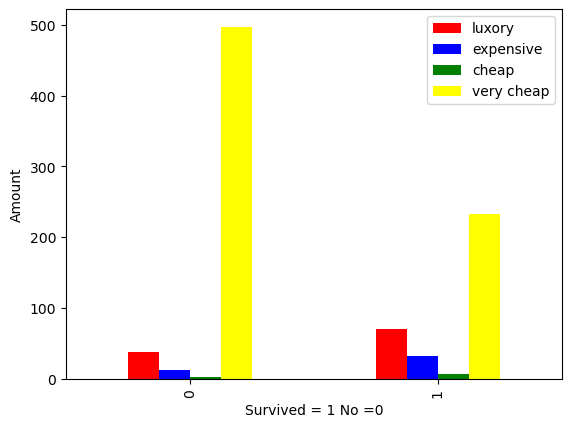

In [79]:
pd.crosstab(data_csv['Survived'], data_csv['Fare_type']).plot(kind='bar', color=['red', 'blue', 'green', 'yellow']);
plt.ylabel("Amount")
plt.xlabel("Survived = 1 No =0")
plt.legend(["luxory","expensive","cheap","very cheap"]);

* We've divided people on groups by 'Fare' and got column 'Fare_type'
* The most of people with very cheap cards haven't survived
* We have great correation between 'Fare' and 'Pclass'(socio-economic status).

In [82]:
data_csv.corr()['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096067
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Name: Fare, dtype: float64

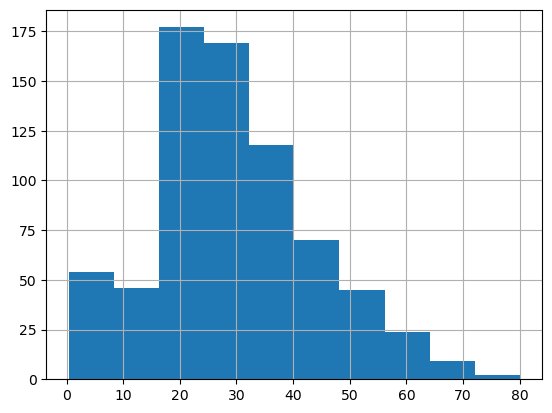

In [83]:
data_csv['Age'].hist();

# Fill missing data

In [84]:
data_csv['Age'].median(), data_csv['Age'].mean()

(28.0, 29.69911764705882)

* We are going to fill missing 'Age' values with median value for 'Age' column

In [85]:
data_csv['Age'].fillna(data_csv['Age'].median(), inplace=True)

In [86]:
data_csv['Cabin'].isna().sum()

687

* We are going to drop column 'Cabin' because we have a lot of missing data inside and we don't have a significant correlation with 'Survived'.

In [87]:
data_csv = data_csv.drop(columns='Cabin')


In [88]:
data_csv.shape

(891, 12)

In [89]:
data_csv['Embarked'].isna().sum()

2

In [90]:
data_csv['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We are going to fill 'Embarked' column with 'S' because we have the most of that value in column

In [91]:
data_csv['Embarked'] = data_csv['Embarked'].fillna("S")

In [92]:
data_csv['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
data_csv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Fare_type      0
dtype: int64

# Turn into numbers

In [94]:
for label, content in data_csv.items():
    if pd.api.types.is_object_dtype(content):
        data_csv[label] = content.astype("category").cat.as_ordered()


In [95]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Fare_type    891 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 116.1 KB


In [96]:
data_csv['Name'] = data_csv['Name'].cat.codes
data_csv['Sex'] = data_csv['Sex'].cat.codes
data_csv['Ticket'] = data_csv['Ticket'].cat.codes
data_csv['Embarked'] = data_csv['Embarked'].cat.codes
data_csv['Fare_type'] = data_csv['Fare_type'].cat.codes

In [97]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
 11  Fare_type    891 non-null    int8   
dtypes: float64(2), int16(2), int64(5), int8(3)
memory usage: 54.9 KB


### Import test data

In [98]:
test_csv = pd.read_csv("test.csv")

In [99]:
data_csv.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_type
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,0.013128,-0.006451
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.167675,-0.265741
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.162098,0.577612
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,-0.006117,0.043961
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.108262,0.166827
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.018754,-0.175888
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.068230,-0.186405
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.039798,-0.059583
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.001729,0.139208
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.224719,-0.556821


In [100]:
data_2 = data_csv.copy()

In [101]:
data_2 = data_2.drop(['Name', 'SibSp'], axis = 1)

In [102]:
test_csv.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* We are going to drop column 'Cabin' because we don't have that column in training set too

In [105]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [103]:
test_csv = test_csv.drop(columns='Cabin')


* We have got one missing value in 'Fare'column and we're going to fill it with mean of 'Fare'

In [104]:
test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].mean())

* We are going to fill 'Age' with mean of 'Age'

In [106]:
test_csv['Age'].fillna(test_csv['Age'].mean(), inplace=True)

In [110]:
test_csv['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [114]:
min(test_csv['Fare']), max(test_csv['Fare']), test_csv['Fare'].mean()

(0.0, 512.3292, 35.6271884892086)

* And we have to add 'Fare_type' column too

In [117]:
test_csv['Fare_type']= 1
for j in range(len(test_csv)):
    if test_csv['Fare'][j]>=250:
        test_csv['Fare_type'][j]= 'luxory fare'
    elif test_csv['Fare'][j]<250 and test_csv['Fare'][j]>=100:
        test_csv['Fare_type'][j] = 'expensive fare'
    elif test_csv['Fare'][j]<100 and test_csv['Fare'][j]>=50:
        test_csv['Fare_type'][j] = 'cheap fare'
    elif test_csv['Fare'][j]<50:
        test_csv['Fare_type'][j] = 'very cheap fare'

C:\Users\USER\AppData\Local\Temp\ipykernel_96888\1121148237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_csv['Fare_type'][j] = 'very cheap fare'


In [119]:
test_csv['Fare_type'].value_counts()

very cheap fare    337
cheap fare          50
expensive fare      23
luxory fare          8
Name: Fare_type, dtype: int64

In [120]:
test_csv.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Fare_type      0
dtype: int64

In [121]:
for label, content in test_csv.items():
    if pd.api.types.is_object_dtype(content):
        test_csv[label] = content.astype("category").cat.as_ordered()

In [122]:
test_csv['Name'] = test_csv['Name'].cat.codes
test_csv['Sex'] = test_csv['Sex'].cat.codes
test_csv['Ticket'] = test_csv['Ticket'].cat.codes
test_csv['Embarked'] = test_csv['Embarked'].cat.codes
test_csv['Fare_type'] = test_csv['Fare_type'].cat.codes

# Import machine learning library and split data

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
np.random.seed(42)
X = data_csv.drop('Survived', axis = 1)
y = data_csv['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators=500)

In [124]:
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.8379888268156425

In [125]:
np.random.seed(42)
clf2 = ExtraTreesClassifier(n_estimators=2000)
clf2.fit(X_train, y_train)
clf2.score(X_val, y_val)

0.8379888268156425

In [126]:
np.random.seed(42)
X1 = data_2.drop('Survived', axis = 1)
y1 = data_2['Survived']
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size = 0.2)
clf3 = ExtraTreesClassifier(n_estimators=2000)
clf3.fit(X1_train, y1_train)
clf3.score(X1_val, y1_val)

0.8491620111731844

# Make prediction

In [128]:
y_test = clf2.predict(test_csv)

In [129]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [130]:
submission_data = pd.DataFrame(columns=['PassengerId','Survived'])

In [131]:
submission_data['PassengerId'] = test_csv['PassengerId']

In [132]:
submission_data['Survived'] = y_test

In [133]:
submission_data['Survived'].value_counts()

0    260
1    158
Name: Survived, dtype: int64

In [134]:
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [135]:
submission_data.to_csv("submission_results.csv", index=False)